## DAB304-Healthcare Project
## MIMIC-III Clinical Database 1.4
## COMBINED TABLE


**Websites:** 

https://physionet.org/content/mimiciii/1.4/

https://mimic.mit.edu/docs/iii/tables/

https://mit-lcp.github.io/mimic-schema-spy/tables/prescriptions.html

https://www.aapc.com/codes/icd9-codes-vol3-range

**Admission Table Description:**

- row_id: Unique row identifier.
- subject_id: Foreign key. Identifies the patient.
- hadm_id: Primary key. Identifies the hospital stay.
- admittime: Time of admission to the hospital.
- dischtime: Time of discharge from the hospital.
- deathtime: Time of death. Nullable.
- admission_type: Type of admission, for example, emergency or elective.
- admission_location: Admission location.
- discharge_location: Discharge location.
- insurance: Insurance type.
- language: Language. Nullable.
- religion: Religion. Nullable.
- marital_status: Marital status. Nullable.
- ethnicity: Ethnicity.
- edregtime: Time of registration in the emergency department. Nullable.
- edouttime: Time of leaving the emergency department. Nullable.
- diagnosis: Diagnosis. Nullable.
- hospital_expire_flag: Hospital admission has at least one observation in the CHARTEVENTS table. Nullable.
- has_chartevents_data: Hospital admission has at least one observation in the CHARTEVENTS table.

**Patients Table Description:**

- row_id: Unique row identifier.
- subject_id: Primary key. Identifies the patient.
- gender: Gender.
- dob: Date of birth.
- dod: Date of death. Null if the patient was alive at least 90 days post hospital discharge.
- dod_hosp: Date of death recorded in the hospital records.
- dod_ssn: Date of death recorded in the social security records.
- expire_flag: Flag indicating that the patient has died.



**Prescription Table Description:**

- row_id: Unique row identifier.
- subject_id: Foreign key. Identifies the patient.
- hadm_id: Foreign key. Identifies the hospital stay.
- icustay_id: Foreign key. Identifies the ICU stay.
- startdate: Date when the prescription started.
- enddate: Date when the prescription ended.
- drug_type: Type of drug.
- drug: Name of the drug.
- drug_name_poe: Name of the drug on the Provider Order Entry interface.
- drug_name_generic: Generic drug name.
- formulary_drug_cd: Formulary drug code.
- gsn: Generic Sequence Number.
- ndc: National Drug Code.
- prod_strength: Strength of the drug (product).
- dose_val_rx: Dose of the drug prescribed.
- dose_unit_rx:	Unit of measurement associated with the dose.
- form_val_disp: Amount of the formulation dispensed.
- form_unit_disp: Unit of measurement associated with the formulation.
- route: Route of administration, for example intravenous or oral.


**Diagnosis ICD Table Description:**

- row_id:	Unique row identifier.
- subject_id: Foreign key. Identifies the patient.
- hadm_id:Foreign key. Identifies the hospital stay.
- seq_num: Priority of the code. Sequence 1 is the primary code.
- icd9_code: ICD9 code for the diagnosis.


**Transfers Table Description:**

- row_id: Unique row identifier.
- subject_id: Foreign key. Identifies the patient.
- hadm_id: Foreign key. Identifies the hospital stay.
- icustay_id: Foreign key. Identifies the ICU stay.
- dbsource: Source database of the item.
- eventtype: Type of event, for example admission or transfer.
- prev_careunit: Previous careunit.
- curr_careunit: Current careunit.
- prev_wardid: Identifier for the previous ward the patient was located in.
- curr_wardid: Identifier for the current ward the patient is located in.
- intime: Time when the patient was transferred into the unit.
- outtime:Time when the patient was transferred out of the unit.
- los: Length of stay in the unit in minutes.


**ICUSTAYS Table Description:**

- row_id: Unique row identifier.
- subject_id: Foreign key. Identifies the patient.
- hadm_id: Foreign key. Identifies the hospital stay.
- icustay_id: Primary key. Identifies the ICU stay.
- dbsource: Source database of the item.
- first_careunit: First careunit associated with the ICU stay.
- last_careunit: Last careunit associated with the ICU stay.
- first_wardid: Identifier for the first ward the patient was located in.
- last_wardid: Identifier for the last ward the patient is located in.
- intime: Time of admission to the ICU.
- outtime: Time of discharge from the ICU.
- los: Length of stay in the ICU in fractional days.


**Important Notes:**

- For datetime data, due to data deidentification, please refer to the following link: https://www.nature.com/articles/sdata201635

- For Patients table: DOB: Patients who are older than 89 years old at any time in the database have had their date of birth shifted to obscure their age and comply with HIPAA. The shift process was as follows: the patient’s age at their first admission was determined. The date of birth was then set to exactly 300 years before their first admission.

- For Diagnosis Table: According to the description provided, SEQ_NUM provides the order in which the ICD diagnoses relate to the patient. ICD diagnoses are ordered by priority - and the order does have an impact on the reimbursement for treatment. and ICD9_CODE contains the actual code corresponding to the diagnosis assigned to the patient for the given row. Note that all codes, as of MIMIC-III v1.0, are ICD-9 codes. These two are quite important columns and we can't replace or delete these missing values.

In [1]:
#importing libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading clean datasets

admissions_clean = pd.read_csv("admissions_clean.csv")
patients_clean = pd.read_csv("patients_table_clean.csv")
diagnosis_clean = pd.read_csv("DIAGNOSES_ICD_table_clean.csv")
prescriptions_clean = pd.read_csv("prescription_table_clean.csv")
transfers_clean = pd.read_csv("Table-TRANSFER_clean_data.csv")
icustays_clean = pd.read_csv("icustays_clean.csv")


In [3]:
#display the dataframe

print(f'admissions_shape:', admissions_clean.shape)
print(f'patients_shape:', patients_clean.shape)
print(f'diagnosis_shape:', diagnosis_clean.shape)
print(f'prescriptions_shape:', prescriptions_clean.shape)
print(f'transfers_shape:', transfers_clean.shape)
print(f'icustays_shape:', icustays_clean.shape)

admissions_shape: (58976, 23)
patients_shape: (46520, 8)
diagnosis_shape: (651047, 5)
prescriptions_shape: (4156450, 19)
transfers_shape: (261897, 13)
icustays_shape: (61532, 16)


In [4]:
#checking table informations
print(f'admissions_info:', admissions_clean.info())
print(f'patients_info:', patients_clean.info())
print(f'prescriptions_info:',prescriptions_clean.info())
print(f'diagnosis_info:', diagnosis_clean.info())
print(f'transfers_info:', transfers_clean.info())
print(f'icustays_info:', icustays_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ROW_ID                58976 non-null  int64  
 1   SUBJECT_ID            58976 non-null  int64  
 2   HADM_ID               58976 non-null  int64  
 3   ADMITTIME             58976 non-null  object 
 4   DISCHTIME             58976 non-null  object 
 5   DEATHTIME             5854 non-null   object 
 6   ADMISSION_TYPE        58976 non-null  object 
 7   ADMISSION_LOCATION    58976 non-null  object 
 8   DISCHARGE_LOCATION    58976 non-null  object 
 9   INSURANCE             58976 non-null  object 
 10  LANGUAGE              58976 non-null  object 
 11  RELIGION              58976 non-null  object 
 12  MARITAL_STATUS        58976 non-null  object 
 13  ETHNICITY             58976 non-null  object 
 14  EDREGTIME             30877 non-null  object 
 15  EDOUTTIME          

## EXPLORATORY DATA ANALYSIS 

- **Combaining the tables**



    - Admissions and patients tables

In [5]:
#to merge admission and patients data:

merged_data = pd.merge(admissions_clean, patients_clean,
                       on = ['SUBJECT_ID'],
                       how = 'right'
)

merged_data.head(2)

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,adm_disch_diff,disch_death_diff,erreg_erout_diff,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,321,249,116935,2149-12-17 20:41:00,2149-12-31 14:55:00,NaN,URGENT/EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,13.759722,NaN,0.434028,234,F,2075-03-13,1900-01-01,1900-01-01,1900-01-01,No
1,322,249,149546,2155-02-03 20:16:00,2155-02-14 11:15:00,NaN,URGENT/EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,10.624306,NaN,0.154861,234,F,2075-03-13,1900-01-01,1900-01-01,1900-01-01,No


In [6]:
#checking shape and info
print(f'merged_data_shape:', merged_data.shape)
print(f'merged_data_info:', merged_data.info())

merged_data_shape: (58976, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58976 entries, 0 to 58975
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ROW_ID_x              58976 non-null  int64  
 1   SUBJECT_ID            58976 non-null  int64  
 2   HADM_ID               58976 non-null  int64  
 3   ADMITTIME             58976 non-null  object 
 4   DISCHTIME             58976 non-null  object 
 5   DEATHTIME             5854 non-null   object 
 6   ADMISSION_TYPE        58976 non-null  object 
 7   ADMISSION_LOCATION    58976 non-null  object 
 8   DISCHARGE_LOCATION    58976 non-null  object 
 9   INSURANCE             58976 non-null  object 
 10  LANGUAGE              58976 non-null  object 
 11  RELIGION              58976 non-null  object 
 12  MARITAL_STATUS        58976 non-null  object 
 13  ETHNICITY             58976 non-null  object 
 14  EDREGTIME             30877 non-null  o

     - Merged data and ICUstays tables

In [7]:
#to merge icustays with merged_data(adm and patients) using 'HADM_ID' as the primary key

merged_data_2 = pd.merge(merged_data, icustays_clean,
                         on='HADM_ID',
                         how='right')

merged_data_2.head(2)

,ROW_ID_x,SUBJECT_ID_x,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,INTIME_YearMonth,OUTTIME_YearMonth,INTIME_Year,OUTTIME_Year
0,344,268,110404,2198-02-11 13:40:00,2198-02-18 03:55:00,2198-02-18 03:55:00,URGENT/EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,...,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,2198,2198.0,2198,2198.0
1,345,269,106296,2170-11-05 11:04:00,2170-11-27 18:00:00,NaN,URGENT/EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,...,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,2170,2170.0,2170,2170.0


In [8]:
#checking shape and info
print(f'merged_data_2_shape:', merged_data_2.shape)
print(f'merged_data_2_info:', merged_data_2.info())

merged_data_2_shape: (61532, 45)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61532 entries, 0 to 61531
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ROW_ID_x              61532 non-null  int64  
 1   SUBJECT_ID_x          61532 non-null  int64  
 2   HADM_ID               61532 non-null  int64  
 3   ADMITTIME             61532 non-null  object 
 4   DISCHTIME             61532 non-null  object 
 5   DEATHTIME             6609 non-null   object 
 6   ADMISSION_TYPE        61532 non-null  object 
 7   ADMISSION_LOCATION    61532 non-null  object 
 8   DISCHARGE_LOCATION    61532 non-null  object 
 9   INSURANCE             61532 non-null  object 
 10  LANGUAGE              61532 non-null  object 
 11  RELIGION              61532 non-null  object 
 12  MARITAL_STATUS        61532 non-null  object 
 13  ETHNICITY             61532 non-null  object 
 14  EDREGTIME             32772 non-null 

     - Merged data_2 and Transfers tables
     
     Note: When merging "Transfers" table in the dataframe where admission, patient and icustays have been merged, this created duplicated rows for SUBJECT_ID. Therefore we had to remove those duplicated SUBJECT_ID_x and SUBJECT_ID_y and keep only one SUBJECT_ID.

In [9]:
#to rename duplicate column SUBJECT_ID_x to SUBJECT_ID
merged_data_2.rename(columns={'SUBJECT_ID_x': 'SUBJECT_ID'}, inplace=True)

#to drop duplicate column SUBJECT_ID_y column
merged_data_2.drop(columns='SUBJECT_ID_y', inplace=True)

#to verify the column names after renaming and dropping
print(merged_data_2.columns)


Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'Readmitted',
       'adm_disch_diff', 'disch_death_diff', 'erreg_erout_diff', 'ROW_ID_y',
       'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'ROW_ID',
       'ICUSTAY_ID', 'DBSOURCE', 'FIRST_CAREUNIT', 'LAST_CAREUNIT',
       'FIRST_WARDID', 'LAST_WARDID', 'INTIME', 'OUTTIME', 'LOS',
       'INTIME_YearMonth', 'OUTTIME_YearMonth', 'INTIME_Year', 'OUTTIME_Year'],
      dtype='object')


In [10]:
#to merge transfers table with merged_data_2(adm, patients, icustays) using 'HADM_ID','SUBJECT_ID', 'ICUSTAY_ID' as primary keys
merged_data_3 = pd.merge(merged_data_2,transfers_clean,
                         on=['HADM_ID','SUBJECT_ID', 'ICUSTAY_ID'],
                         how='right')

merged_data_3.head(2)

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,ROW_ID_y,DBSOURCE_y,EVENTTYPE,PREV_CAREUNIT,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME_y,OUTTIME_y,LOS_y
0,151.0,111,192123,2142-04-24 06:55:00,2142-05-05 11:45:00,NaN,URGENT/EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,...,657,carevue,transfer,CCU,MICU,7.0,23.0,2142-04-29 15:27:11,2142-05-04 20:38:33,125.19
1,NaN,111,192123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,658,carevue,transfer,MICU,NaN,23.0,45.0,2142-05-04 20:38:33,2142-05-05 11:46:32,15.13


In [11]:
#checking shape and info
print(f'merged_data_3_shape:', merged_data_3.shape)
print(f'merged_data_3_info:', merged_data_3.info())

merged_data_3_shape: (261897, 54)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 261897 entries, 0 to 261896
Data columns (total 54 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ROW_ID_x              51832 non-null   float64
 1   SUBJECT_ID            261897 non-null  int64  
 2   HADM_ID               261897 non-null  int64  
 3   ADMITTIME             51832 non-null   object 
 4   DISCHTIME             51832 non-null   object 
 5   DEATHTIME             5069 non-null    object 
 6   ADMISSION_TYPE        51832 non-null   object 
 7   ADMISSION_LOCATION    51832 non-null   object 
 8   DISCHARGE_LOCATION    51832 non-null   object 
 9   INSURANCE             51832 non-null   object 
 10  LANGUAGE              51832 non-null   object 
 11  RELIGION              51832 non-null   object 
 12  MARITAL_STATUS        51832 non-null   object 
 13  ETHNICITY             51832 non-null   object 
 14  EDREGTIME         

     - Merged data_3 and Diagnosis tables

In [12]:
#To merge diagnoses with merged_data_3(adm, patients, icustays, transfers) using 'HADM_ID' as primary key
merged_mimicIII_data = pd.merge(merged_data_3, diagnosis_clean,
                         on=['HADM_ID'],
                         how='right')

merged_mimicIII_data.head(2)

,ROW_ID_x,SUBJECT_ID_x,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME_y,OUTTIME_y,LOS_y,ROW_ID,SUBJECT_ID_y,SEQ_NUM,ICD9_CODE
0,128.0,109,172335,2141-09-18 10:32:00,2141-09-24 13:53:00,NaN,URGENT/EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,...,MICU,36.0,23.0,2141-09-20 20:44:36,2141-09-22 21:44:50,49.00,1297,109,1.0,40301
1,NaN,109,172335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,45.0,2141-09-22 21:44:50,2141-09-23 21:38:05,23.89,1297,109,1.0,40301


In [13]:
#To rename columns
merged_mimicIII_data.rename(columns={'SUBJECT_ID_x': 'SUBJECT_ID',
                               'INTIME_x': 'INTIME_ICU',
                               'OUTTIME_x': 'OUTTIME_ICU',
                               'LOS_x': 'LOS_ICU',
                               'INTIME_y': 'INTIME_TRANSFER',
                               'OUTTIME_y': 'OUTTIME_TRANSFER',
                               'LOS_y': 'LOS_TRANSFER',
                               'DBSOURCE_y': 'DBSOURCE'}, inplace=True)

#To drop columns not useful for analysis
columns_to_drop = ['SUBJECT_ID_y', 'ROW_ID_x', 'ROW_ID_x', 'SEQ_NUM',
                   'ROW_ID','ROW_ID_y','DBSOURCE_x', 'DOD_SSN', 'ROW_ID_y', 'LANGUAGE', 'RELIGION']
merged_mimicIII_data.drop(columns=columns_to_drop, inplace=True)

#To verify the column names after renaming and dropping
print(merged_mimicIII_data.columns)


Index(['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME',
       'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION',
       'INSURANCE', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA',
       'Readmitted', 'adm_disch_diff', 'disch_death_diff', 'erreg_erout_diff',
       'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'EXPIRE_FLAG', 'ICUSTAY_ID',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME_ICU', 'OUTTIME_ICU', 'LOS_ICU', 'INTIME_YearMonth',
       'OUTTIME_YearMonth', 'INTIME_Year', 'OUTTIME_Year', 'DBSOURCE',
       'EVENTTYPE', 'PREV_CAREUNIT', 'CURR_CAREUNIT', 'PREV_WARDID',
       'CURR_WARDID', 'INTIME_TRANSFER', 'OUTTIME_TRANSFER', 'LOS_TRANSFER',
       'ICD9_CODE'],
      dtype='object')


In [14]:
merged_mimicIII_data.head(2)

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,...,DBSOURCE,EVENTTYPE,PREV_CAREUNIT,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME_TRANSFER,OUTTIME_TRANSFER,LOS_TRANSFER,ICD9_CODE
0,109,172335,2141-09-18 10:32:00,2141-09-24 13:53:00,NaN,URGENT/EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,SINGLE,...,metavision,transfer,NaN,MICU,36.0,23.0,2141-09-20 20:44:36,2141-09-22 21:44:50,49.00,40301
1,109,172335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,metavision,transfer,MICU,NaN,23.0,45.0,2141-09-22 21:44:50,2141-09-23 21:38:05,23.89,40301


In [15]:
#checking shape and info
print(f'merged_mimicIII_data_shape:', merged_mimicIII_data.shape)
print(f'merged_mimicIII_data_info:', merged_mimicIII_data.info())

merged_mimicIII_data_shape: (3008857, 47)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008857 entries, 0 to 3008856
Data columns (total 47 columns):
 #   Column                Dtype  
---  ------                -----  
 0   SUBJECT_ID            int64  
 1   HADM_ID               int64  
 2   ADMITTIME             object 
 3   DISCHTIME             object 
 4   DEATHTIME             object 
 5   ADMISSION_TYPE        object 
 6   ADMISSION_LOCATION    object 
 7   DISCHARGE_LOCATION    object 
 8   INSURANCE             object 
 9   MARITAL_STATUS        object 
 10  ETHNICITY             object 
 11  EDREGTIME             object 
 12  EDOUTTIME             object 
 13  DIAGNOSIS             object 
 14  HOSPITAL_EXPIRE_FLAG  float64
 15  HAS_CHARTEVENTS_DATA  float64
 16  Readmitted            float64
 17  adm_disch_diff        float64
 18  disch_death_diff      float64
 19  erreg_erout_diff      float64
 20  GENDER                object 
 21  DOB                   object 
 22  

- **Updating Datatypes**

In [16]:
# to update data type
to_string = ['SUBJECT_ID', 'HADM_ID', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 
             'Readmitted', 'ICUSTAY_ID']

for col in to_string:
    merged_mimicIII_data[col] = merged_mimicIII_data[col].astype('str')

    
#to update column data type to datetime
to_datetime = ['ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'EDREGTIME', 'EDOUTTIME',
              'DOB', 'DOD', 'DOD_HOSP', 'INTIME_ICU', 'OUTTIME_ICU', 'INTIME_TRANSFER',
               'OUTTIME_TRANSFER']

for col in to_datetime:
    merged_mimicIII_data[col] = pd.to_datetime(merged_mimicIII_data[col])


- **Dealing with missing values**

In [17]:
#dealing with missing values

#missing date
to_missing_date = ['ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'EDREGTIME', 'EDOUTTIME',
                  'DOB', 'DOD', 'DOD_HOSP', 'INTIME_ICU', 'OUTTIME_ICU', 'INTIME_TRANSFER', 
                   'OUTTIME_TRANSFER']

for col in to_missing_date:
    merged_mimicIII_data[col] = merged_mimicIII_data[col].fillna('1900-01-01')


#missing comment
to_missing_values = ['ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE',
                     'MARITAL_STATUS', 'ETHNICITY','EDREGTIME', 'EDOUTTIME','DIAGNOSIS','GENDER', 
                     'FIRST_CAREUNIT','LAST_CAREUNIT', 'DBSOURCE', 'EVENTTYPE', 'PREV_CAREUNIT',
                     'CURR_CAREUNIT','ICD9_CODE']

for col in to_missing_values:
    merged_mimicIII_data[col] = merged_mimicIII_data[col].replace(np.nan, 'No Record')

    
#missing time
#the missing date are using this 1900-01-01 for the null values, therefore the difference will be 0.00

to_missing_hours = ['adm_disch_diff', 'disch_death_diff', 'erreg_erout_diff']

for col in to_missing_hours:
      merged_mimicIII_data[col] = merged_mimicIII_data[col].fillna(0.00)
        

#missing
to_missing_int = ['FIRST_WARDID','LAST_WARDID', 'PREV_WARDID', 'CURR_WARDID' ]

for col in to_missing_int:
     merged_mimicIII_data[col] = merged_mimicIII_data[col].fillna(0)


#missing hours
to_missing_hours = ['LOS_ICU', 'LOS_TRANSFER']

for col in to_missing_hours:
     merged_mimicIII_data[col] = merged_mimicIII_data[col].fillna(0.00)


#missing binary classification 
#0 = they did not, 1 = patient expired(died), 2 = missing information.
to_missing_class = ['HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'Readmitted', 'EXPIRE_FLAG']

for col in to_missing_class:
     merged_mimicIII_data[col] = merged_mimicIII_data[col].fillna(2)


#missing year
to_missing_date = ['INTIME_YearMonth', 'OUTTIME_YearMonth', 'INTIME_Year', 'OUTTIME_Year']

for col in to_missing_date:
    merged_mimicIII_data[col] = merged_mimicIII_data[col].fillna('1900')  



In [18]:
  ##TO BE UPDATE AFTER DEALING WITH MISSING VALUES
    
#to update to integer
to_integer = ['FIRST_WARDID', 'LAST_WARDID', 'INTIME_YearMonth', 'OUTTIME_YearMonth',
              'INTIME_Year', 'OUTTIME_Year', 'PREV_WARDID', 'CURR_WARDID']

for col in to_integer:
    merged_mimicIII_data[col] = merged_mimicIII_data[col].astype('int')

In [19]:
print(f'merged_mimicIII_data_info:', merged_mimicIII_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008857 entries, 0 to 3008856
Data columns (total 47 columns):
 #   Column                Dtype         
---  ------                -----         
 0   SUBJECT_ID            object        
 1   HADM_ID               object        
 2   ADMITTIME             datetime64[ns]
 3   DISCHTIME             datetime64[ns]
 4   DEATHTIME             datetime64[ns]
 5   ADMISSION_TYPE        object        
 6   ADMISSION_LOCATION    object        
 7   DISCHARGE_LOCATION    object        
 8   INSURANCE             object        
 9   MARITAL_STATUS        object        
 10  ETHNICITY             object        
 11  EDREGTIME             datetime64[ns]
 12  EDOUTTIME             datetime64[ns]
 13  DIAGNOSIS             object        
 14  HOSPITAL_EXPIRE_FLAG  object        
 15  HAS_CHARTEVENTS_DATA  object        
 16  Readmitted            object        
 17  adm_disch_diff        float64       
 18  disch_death_diff      float64       
 19  

In [20]:
#checking for null values
merged_mimicIII_data.isnull().sum()

SUBJECT_ID              0
HADM_ID                 0
ADMITTIME               0
DISCHTIME               0
DEATHTIME               0
ADMISSION_TYPE          0
ADMISSION_LOCATION      0
DISCHARGE_LOCATION      0
INSURANCE               0
MARITAL_STATUS          0
ETHNICITY               0
EDREGTIME               0
EDOUTTIME               0
DIAGNOSIS               0
HOSPITAL_EXPIRE_FLAG    0
HAS_CHARTEVENTS_DATA    0
Readmitted              0
adm_disch_diff          0
disch_death_diff        0
erreg_erout_diff        0
GENDER                  0
DOB                     0
DOD                     0
DOD_HOSP                0
EXPIRE_FLAG             0
ICUSTAY_ID              0
FIRST_CAREUNIT          0
LAST_CAREUNIT           0
FIRST_WARDID            0
LAST_WARDID             0
INTIME_ICU              0
OUTTIME_ICU             0
LOS_ICU                 0
INTIME_YearMonth        0
OUTTIME_YearMonth       0
INTIME_Year             0
OUTTIME_Year            0
DBSOURCE                0
EVENTTYPE   

In [21]:
#check summary statistics
merged_mimicIII_data.describe()

,adm_disch_diff,disch_death_diff,erreg_erout_diff,FIRST_WARDID,LAST_WARDID,LOS_ICU,INTIME_YearMonth,OUTTIME_YearMonth,INTIME_Year,OUTTIME_Year,PREV_WARDID,CURR_WARDID,LOS_TRANSFER
count,3.008857e+06,3.008857e+06,3.008857e+06,3.008857e+06,3.008857e+06,3.008857e+06,3.008857e+06,3.008857e+06,3.008857e+06,3.008857e+06,3.008857e+06,3.008857e+06,3.008857e+06
mean,3.318371e+00,3.410210e-04,2.624079e-02,6.481859e+00,6.453496e+00,1.773000e+00,1.949157e+03,1.949157e+03,1.949157e+03,1.949157e+03,2.213745e+01,2.213381e+01,6.479492e+01
std,1.133068e+01,1.564185e-01,9.131415e-02,1.563068e+01,1.553804e+01,8.381233e+00,1.004938e+02,1.005000e+02,1.004938e+02,1.005000e+02,2.095208e+01,2.095133e+01,1.318369e+02
min,-9.451389e-01,-3.000000e+01,-5.083333e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+03,1.900000e+03,1.900000e+03,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+03,1.900000e+03,1.900000e+03,1.900000e+03,0.000000e+00,0.000000e+00,1.300000e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+03,1.900000e+03,1.900000e+03,1.900000e+03,1.700000e+01,1.700000e+01,2.321000e+01
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+03,1.900000e+03,1.900000e+03,1.900000e+03,4.500000e+01,4.500000e+01,7.385000e+01
max,2.946604e+02,6.500000e+01,2.936111e+00,5.700000e+01,5.700000e+01,1.716227e+02,2.209000e+03,2.209000e+03,2.209000e+03,2.209000e+03,5.700000e+01,5.700000e+01,2.087999e+04


- **Visualizations**

- Separate the columns

In [22]:
cat_cols = ['ADMISSION_TYPE','ADMISSION_LOCATION','DISCHARGE_LOCATION',
            'INSURANCE','MARITAL_STATUS','ETHNICITY','DIAGNOSIS','HOSPITAL_EXPIRE_FLAG', 
            'Readmitted', 'GENDER','FIRST_CAREUNIT','LAST_CAREUNIT','DBSOURCE','EVENTTYPE',
            'PREV_CAREUNIT','CURR_CAREUNIT','ICD9_CODE'] 

num_cols = merged_mimicIII_data.select_dtypes(include= [np.number]).columns.to_list()
date_cols = merged_mimicIII_data.select_dtypes(include= ['datetime']).columns.to_list()

print("cat_cols:", cat_cols)
print("num_cols:", num_cols)
print("date_cols:", date_cols)

cat_cols: ['ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'Readmitted', 'GENDER', 'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'DBSOURCE', 'EVENTTYPE', 'PREV_CAREUNIT', 'CURR_CAREUNIT', 'ICD9_CODE']
num_cols: ['adm_disch_diff', 'disch_death_diff', 'erreg_erout_diff', 'FIRST_WARDID', 'LAST_WARDID', 'LOS_ICU', 'INTIME_YearMonth', 'OUTTIME_YearMonth', 'INTIME_Year', 'OUTTIME_Year', 'PREV_WARDID', 'CURR_WARDID', 'LOS_TRANSFER']
date_cols: ['ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'EDREGTIME', 'EDOUTTIME', 'DOB', 'DOD', 'DOD_HOSP', 'INTIME_ICU', 'OUTTIME_ICU', 'INTIME_TRANSFER', 'OUTTIME_TRANSFER']


- EDA | Univariate Analysis

adm_disch_diff


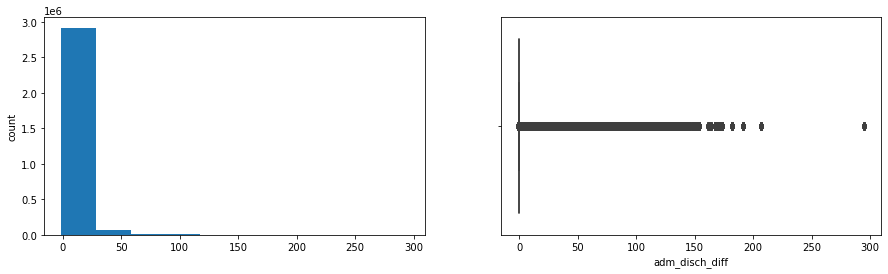

disch_death_diff


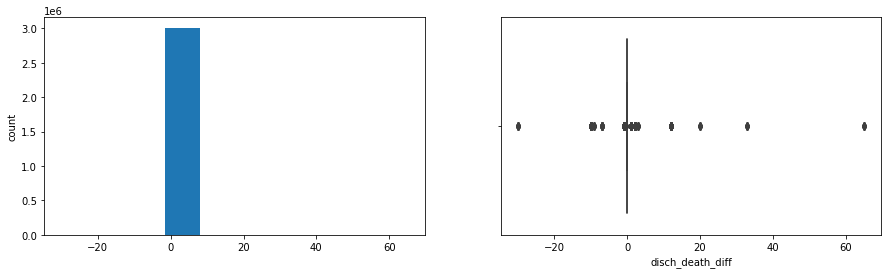

erreg_erout_diff


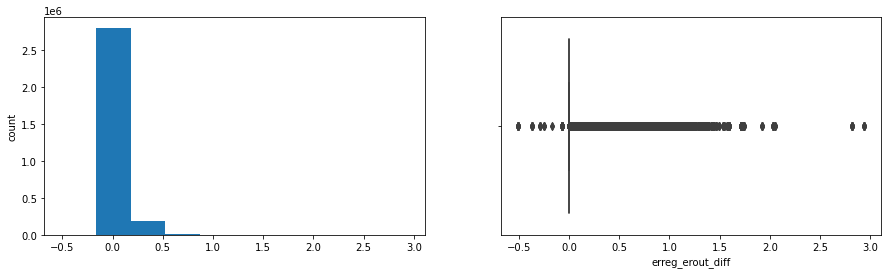

FIRST_WARDID


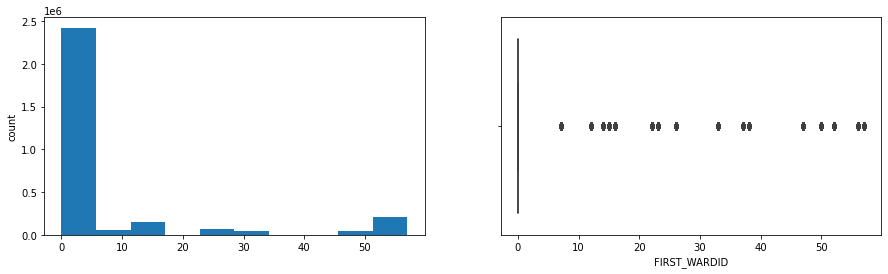

LAST_WARDID


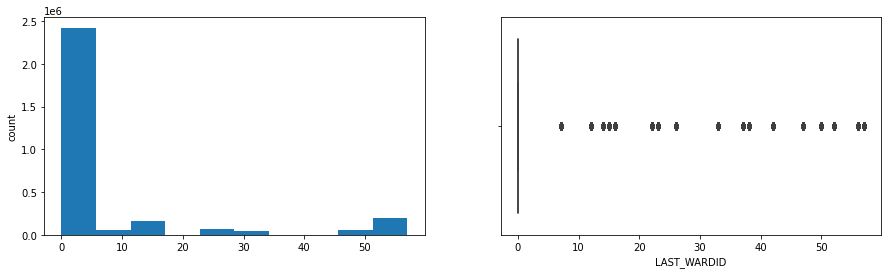

LOS_ICU


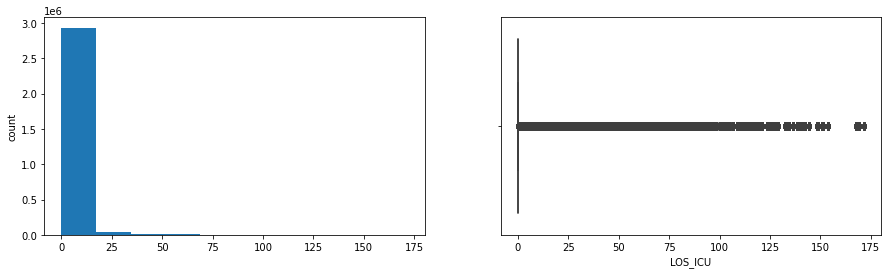

INTIME_YearMonth


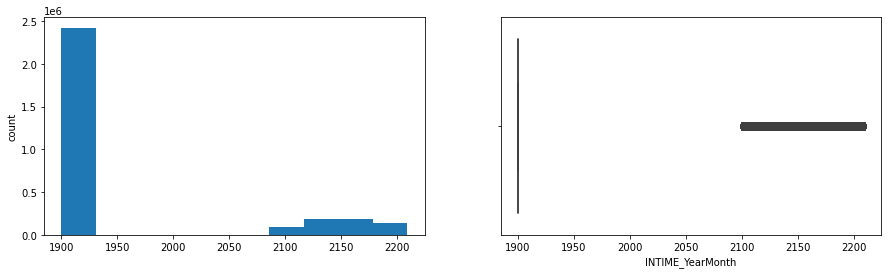

OUTTIME_YearMonth


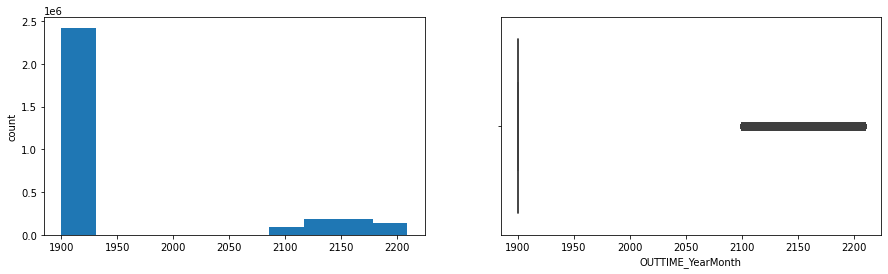

INTIME_Year


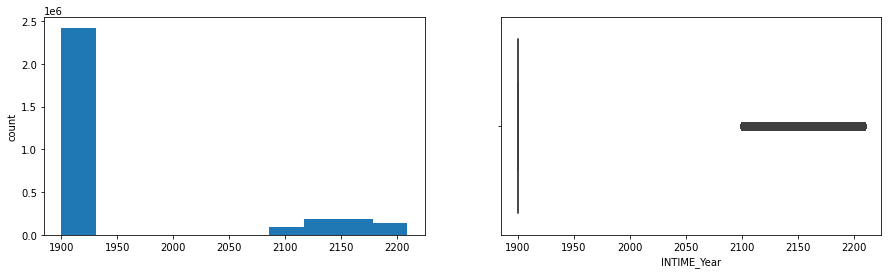

OUTTIME_Year


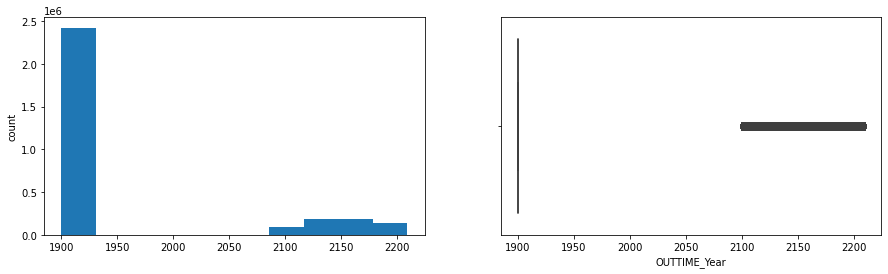

PREV_WARDID


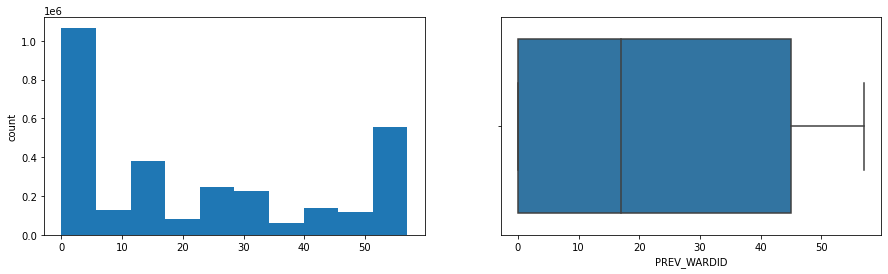

CURR_WARDID


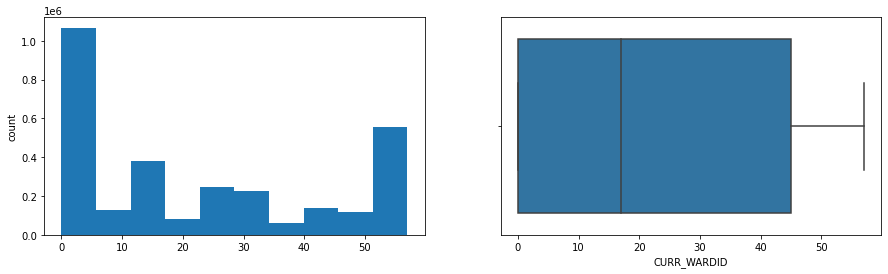

LOS_TRANSFER


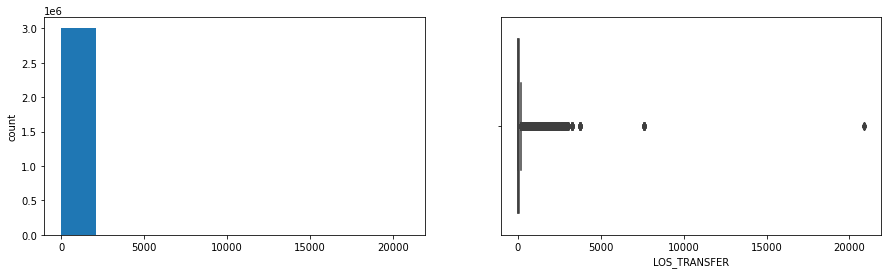

In [23]:
for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    merged_mimicIII_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=merged_mimicIII_data[col])
    plt.show()

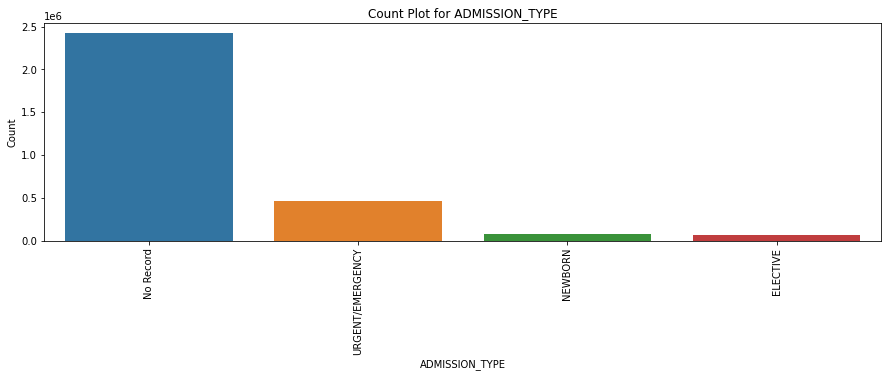

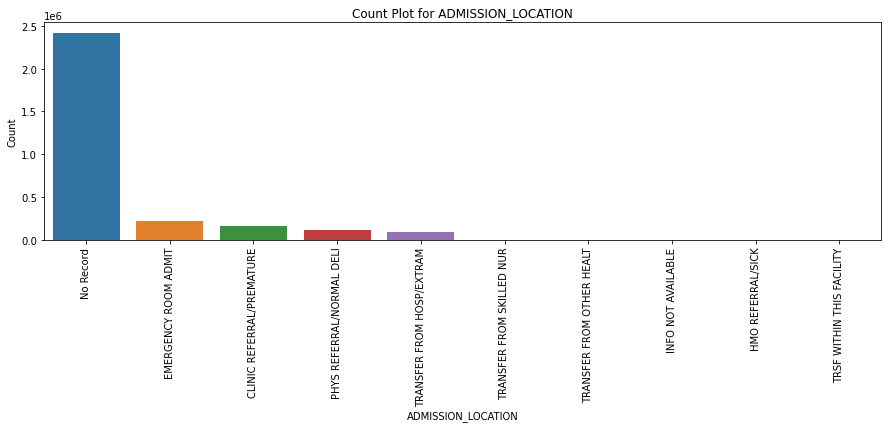

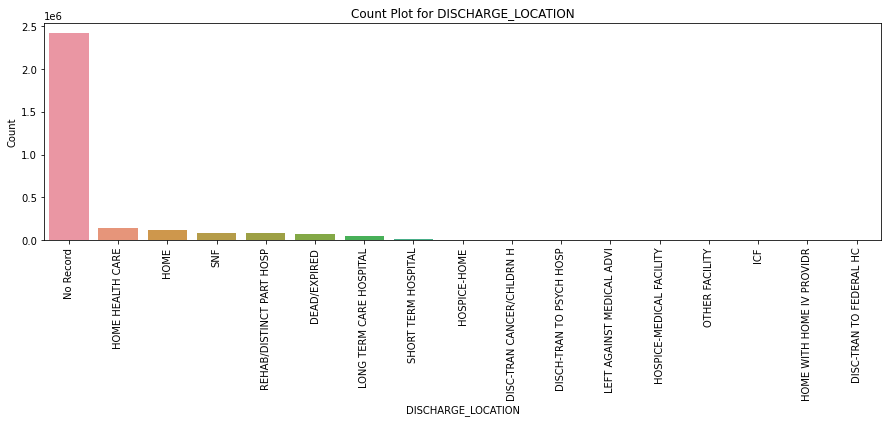

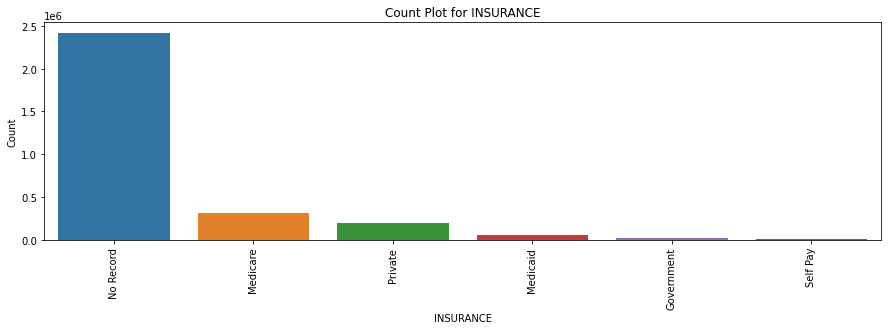

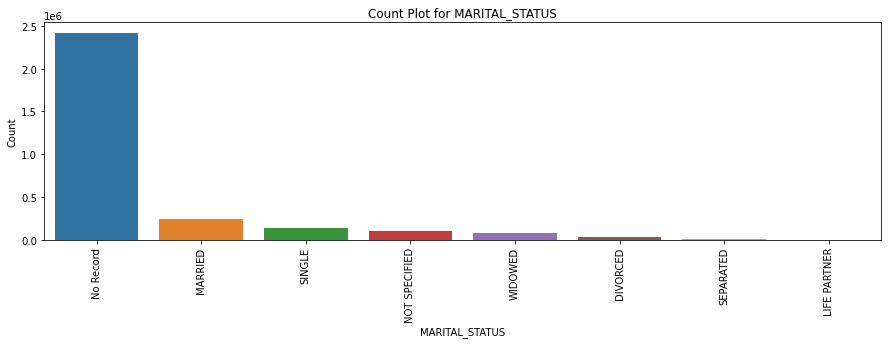

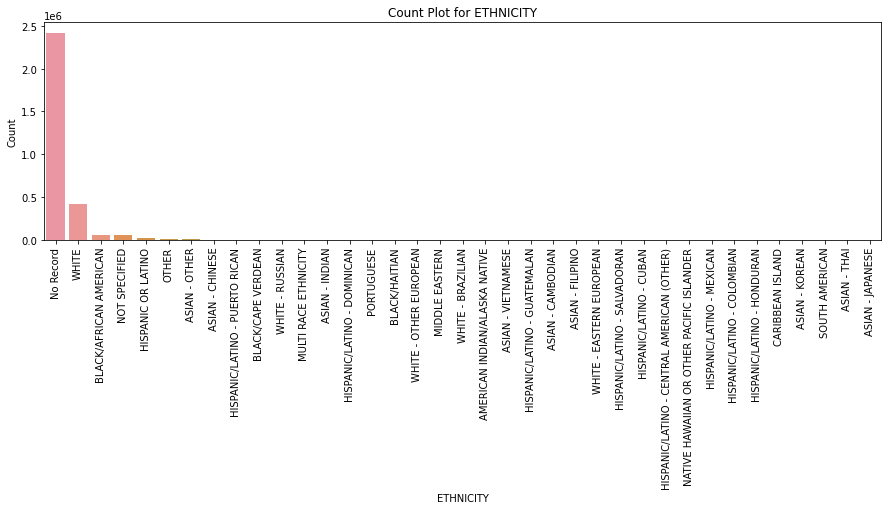

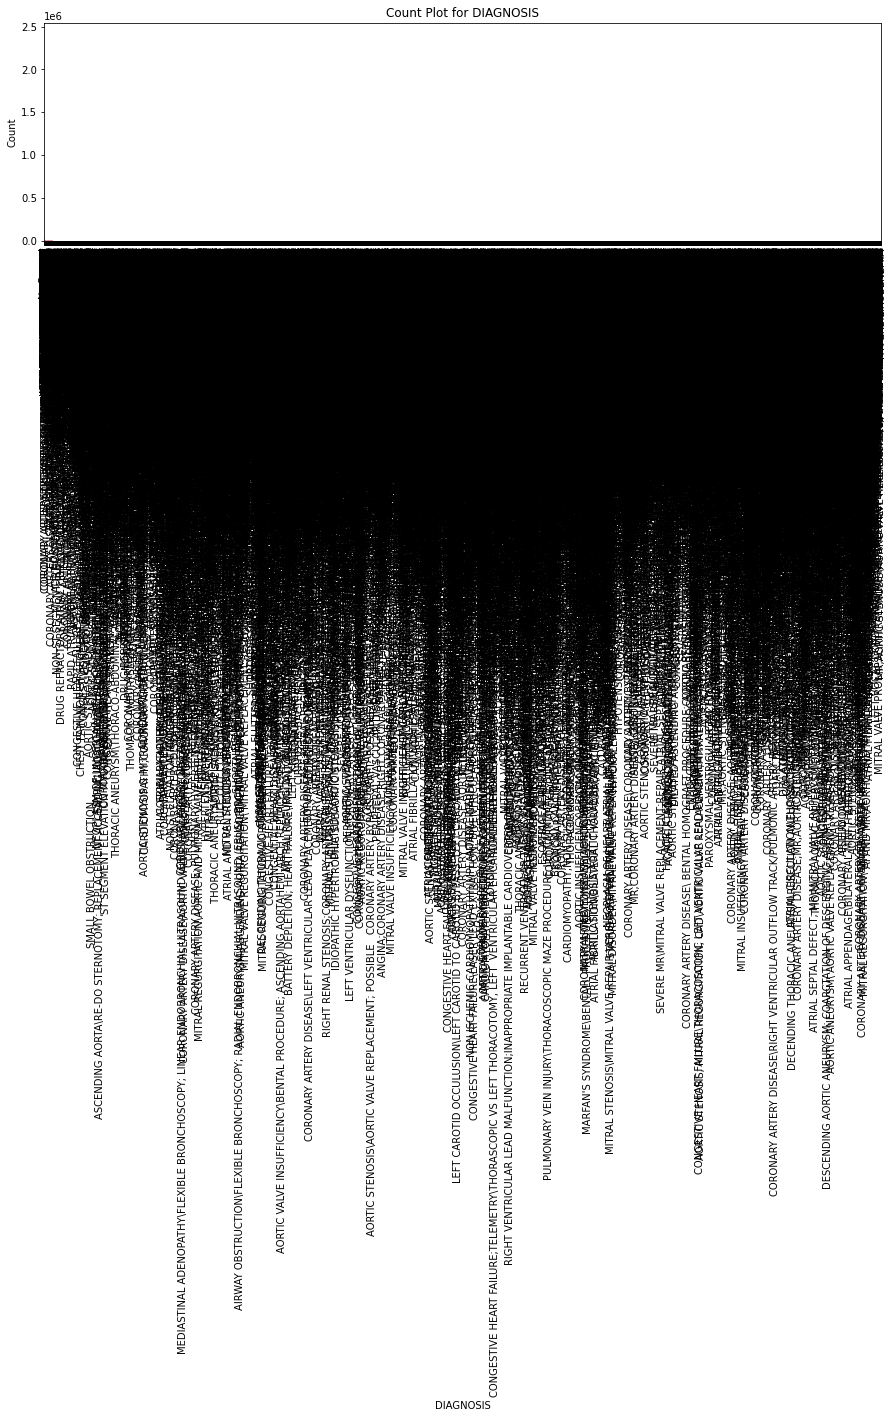

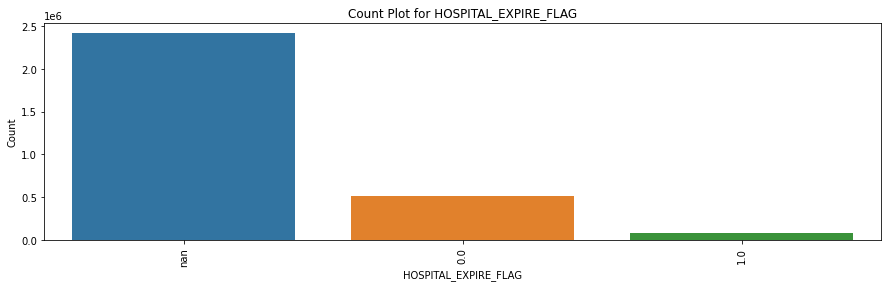

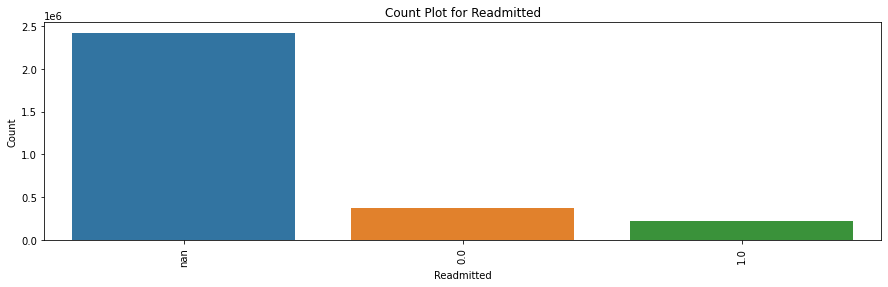

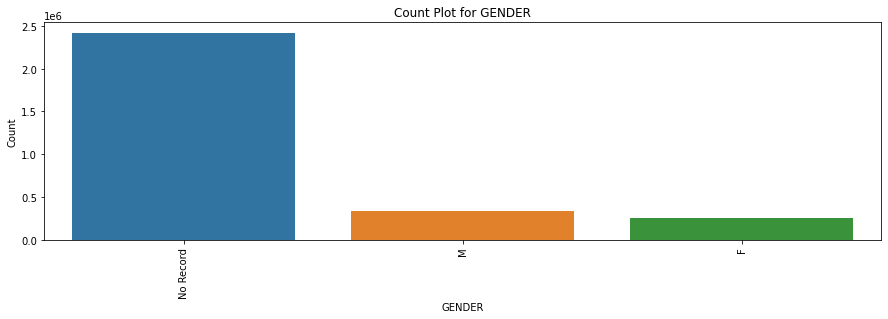

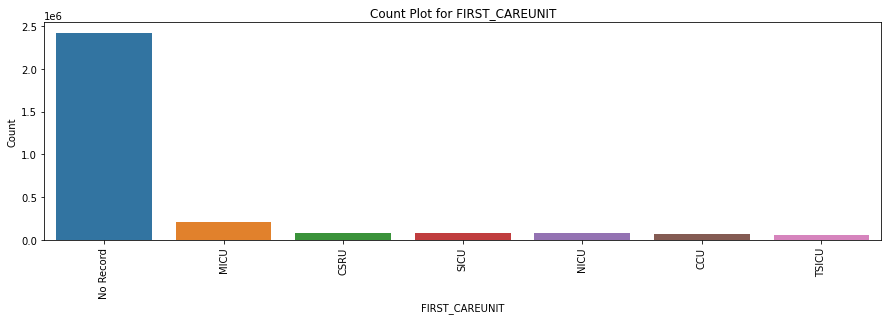

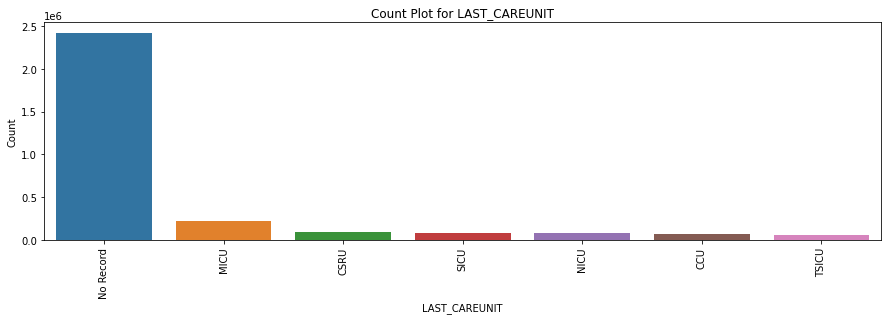

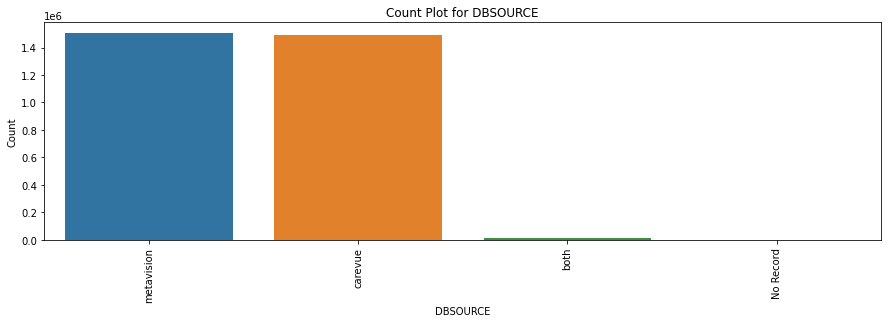

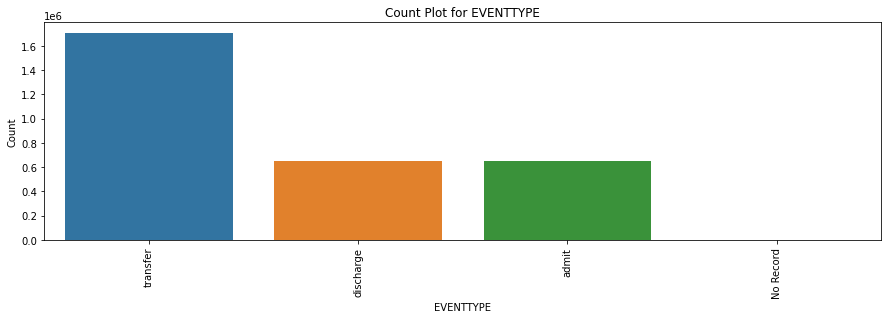

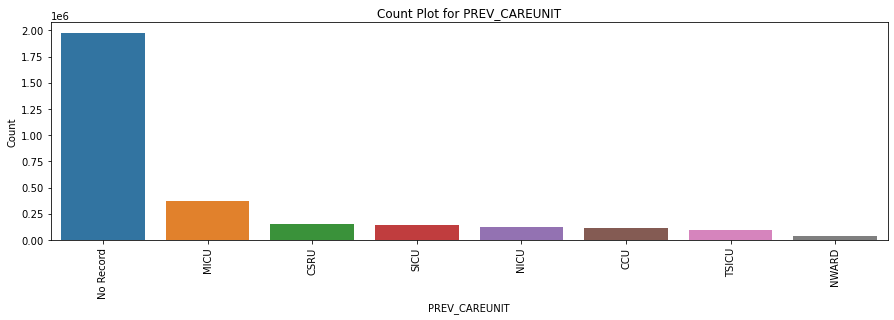

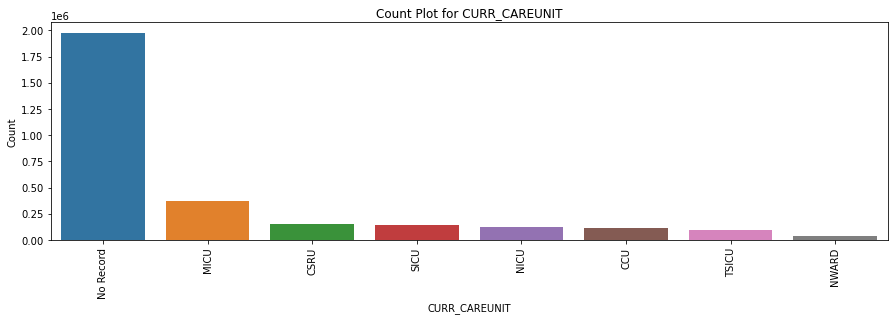

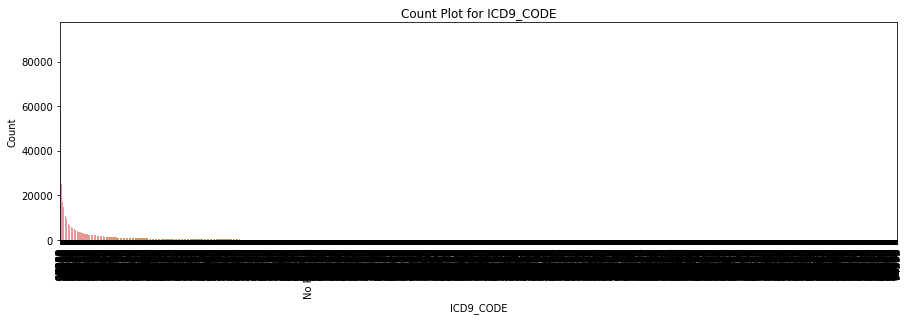

In [24]:
for col in cat_cols:
    plt.figure(figsize=(15, 4))
    sns.countplot(x=col, data=merged_mimicIII_data, order=merged_mimicIII_data[col].value_counts().index)
    plt.ylabel('Count')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=90)
    plt.show()

- Correlation Matrix

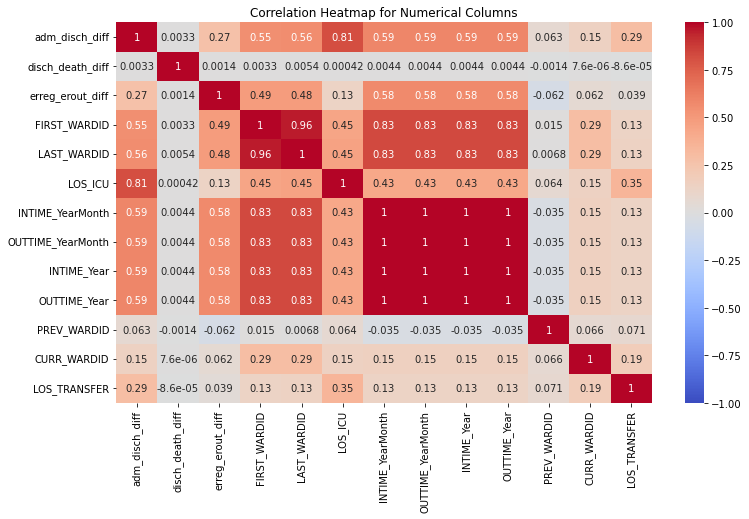

In [25]:
num_cols = merged_mimicIII_data.select_dtypes(include= [np.number])

plt.figure(figsize=(12, 7))
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

## NEXT STEPS 

- PENDING EDA COMMENTS:
    - TO CREATE CATEGORY/GROUP FOR THE ETHNICITY AND DIAGNOSIS IN ORDER TO SUMMARIZE THEN AND BE USEFUL FOR THE ANALYSIS
    - TO ANALIZE TOP TEN ICD_CODES


- ANALYZE PRESCRIPTION TABLE. HOW WILL IT BE PRESENTED? WILL IT BE MERGED WITH WHICH TABLE?
   
   
- IDENTIFY TARGET VARIABLES (MAYBE 2) TO RUN PYCARET

- CHOOSE BEST 5 ML MODELS



## Machine Learning Model